<a href="https://colab.research.google.com/github/claudiaesnarrizaga/TFG/blob/main/Codigo%20colab/TFG_BARRIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔹 PASO 1: Carga y organización de los datos


In [ ]:
# --- 1. IMPORTAR LIBRERÍAS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files

In [ ]:
from google.colab import files
uploaded = files.upload()

# Reemplaza con el nombre correcto de tu archivo
#df = pd.read_excel("TABLA.xlsx")
#df = pd.read_excel("TABLAUnnamed.xlsx")
df = pd.read_excel("TABLAUnnamedindices.xlsx")

Saving TABLAUnnamedindices.xlsx to TABLAUnnamedindices.xlsx


In [ ]:
# Elegimos solo las columnas válidas (sin 'Unnamed')
columnas_validas = [col for col in df.columns if not 'Unnamed' in str(col) and col not in ['VARIABLES ESCOGIDAS/ZONA', 'CIUDAD']]

# Transponemos la tabla
df_variables = df.set_index('VARIABLES ESCOGIDAS/ZONA')
df_transpuesta = df_variables[columnas_validas].transpose()

# Convertimos a numérico
df_transpuesta = df_transpuesta.apply(pd.to_numeric, errors='coerce')

In [ ]:
df_transpuesta

VARIABLES ESCOGIDAS/ZONA,Número Habitantes,Edad media de la población,Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),Porcentaje de envejecimiento (Población mayor de 65 años/Población total),Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),Personas con nacionalidad española,Personas con nacionalidad extranjera,Total hogares,Hogares con una mujer sola mayor de 65 años,...,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con la tenencia de armas,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con el patrimonio,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con la tenencia y consumo de drogas,Inspecciones y actuaciones en locales de espectáculos públicos y actividades recreativas,Expedientes instruidos por Agentes Tutores,Atestados/partes de accidentes de tráfico confeccionados,Personas detenidas e investigadas por la Policía Municipal en materia de seguridad: Total personas detenidas e investigadas,Instalaciones deportivas básicas,Centros deportivos municipales,Superficie deportiva m2
CENTRO,0.042020,44.02,0.068757,0.1587,0.3053,0.2932,0.694652,0.265977,0.052780,0.073281,...,0.636834,0.329926,0.352689,0.194338,0.226013,0.065521,0.257625,0.021739,0.037975,0.0
Palacio,0.167333,45.98,0.067730,0.1929,0.3002,0.3522,0.756165,0.209642,0.167354,0.089140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embajadores,0.334156,42.91,0.075365,0.1375,0.3103,0.2701,0.659477,0.291418,0.324156,0.068220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cortes,0.076824,44.88,0.060066,0.1737,0.2954,0.3067,0.693224,0.274998,0.079354,0.074373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Justicia,0.128869,44.12,0.068787,0.1575,0.3202,0.2915,0.710230,0.262020,0.129867,0.070850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alameda de Osuna,0.400609,46.30,0.152503,0.2658,0.2570,0.7067,0.919748,0.070692,0.402743,0.096138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aeropuerto,0.039285,42.02,0.155977,0.1488,0.3958,0.4352,0.742945,0.232940,0.037909,0.082621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casco Histórico de Barajas,0.153693,45.15,0.106230,0.1993,0.3111,0.4376,0.776393,0.192000,0.172103,0.080640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timón,0.249940,40.12,0.179274,0.1228,0.2959,0.4388,0.867097,0.104597,0.244087,0.048451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sube y carga tu Excel con Google Colab.

Detecta la primera fila como encabezado con nombres de barrios/distritos (algunos repetidos o combinados).

Transforma el Excel para que:

Cada fila sea un barrio o distrito.

Cada columna sea un indicador.

# 🔹 PASO 2: Limpieza de filas inútiles y separación entre barrios y distritos

In [ ]:
# --- PASO 2: Clasificar correctamente distritos y barrios ---

# Reiniciar el índice para trabajar mejor
df_transpuesta = df_transpuesta.reset_index()
df_transpuesta = df_transpuesta.rename(columns={"index": "zona"})

# Crear columnas nuevas
df_transpuesta["distrito"] = None
df_transpuesta["es_barrio"] = None

# Asignar distrito y marcar si es barrio
distrito_actual = None

for i, row in df_transpuesta.iterrows():
    zona = row["zona"]
    if zona == zona.upper():  # si está en mayúsculas, es un distrito
        distrito_actual = zona
        df_transpuesta.at[i, "distrito"] = zona
        df_transpuesta.at[i, "es_barrio"] = False
    else:  # si no, es barrio
        df_transpuesta.at[i, "distrito"] = distrito_actual
        df_transpuesta.at[i, "es_barrio"] = True

# Verificamos las primeras filas
df_transpuesta


VARIABLES ESCOGIDAS/ZONA,zona,Número Habitantes,Edad media de la población,Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),Porcentaje de envejecimiento (Población mayor de 65 años/Población total),Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),Personas con nacionalidad española,Personas con nacionalidad extranjera,Total hogares,...,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con la tenencia y consumo de drogas,Inspecciones y actuaciones en locales de espectáculos públicos y actividades recreativas,Expedientes instruidos por Agentes Tutores,Atestados/partes de accidentes de tráfico confeccionados,Personas detenidas e investigadas por la Policía Municipal en materia de seguridad: Total personas detenidas e investigadas,Instalaciones deportivas básicas,Centros deportivos municipales,Superficie deportiva m2,distrito,es_barrio
0,CENTRO,0.042020,44.02,0.068757,0.1587,0.3053,0.2932,0.694652,0.265977,0.052780,...,0.352689,0.194338,0.226013,0.065521,0.257625,0.021739,0.037975,0.0,CENTRO,False
1,Palacio,0.167333,45.98,0.067730,0.1929,0.3002,0.3522,0.756165,0.209642,0.167354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
2,Embajadores,0.334156,42.91,0.075365,0.1375,0.3103,0.2701,0.659477,0.291418,0.324156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
3,Cortes,0.076824,44.88,0.060066,0.1737,0.2954,0.3067,0.693224,0.274998,0.079354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
4,Justicia,0.128869,44.12,0.068787,0.1575,0.3202,0.2915,0.710230,0.262020,0.129867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Alameda de Osuna,0.400609,46.30,0.152503,0.2658,0.2570,0.7067,0.919748,0.070692,0.402743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARAJAS,True
148,Aeropuerto,0.039285,42.02,0.155977,0.1488,0.3958,0.4352,0.742945,0.232940,0.037909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARAJAS,True
149,Casco Histórico de Barajas,0.153693,45.15,0.106230,0.1993,0.3111,0.4376,0.776393,0.192000,0.172103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARAJAS,True
150,Timón,0.249940,40.12,0.179274,0.1228,0.2959,0.4388,0.867097,0.104597,0.244087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARAJAS,True


In [ ]:
df_transpuesta[df_transpuesta["es_barrio"] == True]

VARIABLES ESCOGIDAS/ZONA,zona,Número Habitantes,Edad media de la población,Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),Porcentaje de envejecimiento (Población mayor de 65 años/Población total),Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),Personas con nacionalidad española,Personas con nacionalidad extranjera,Total hogares,...,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con la tenencia y consumo de drogas,Inspecciones y actuaciones en locales de espectáculos públicos y actividades recreativas,Expedientes instruidos por Agentes Tutores,Atestados/partes de accidentes de tráfico confeccionados,Personas detenidas e investigadas por la Policía Municipal en materia de seguridad: Total personas detenidas e investigadas,Instalaciones deportivas básicas,Centros deportivos municipales,Superficie deportiva m2,distrito,es_barrio
1,Palacio,0.167333,45.98,0.067730,0.1929,0.3002,0.3522,0.756165,0.209642,0.167354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
2,Embajadores,0.334156,42.91,0.075365,0.1375,0.3103,0.2701,0.659477,0.291418,0.324156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
3,Cortes,0.076824,44.88,0.060066,0.1737,0.2954,0.3067,0.693224,0.274998,0.079354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
4,Justicia,0.128869,44.12,0.068787,0.1575,0.3202,0.2915,0.710230,0.262020,0.129867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
5,Universidad,0.234322,43.97,0.065242,0.1601,0.3104,0.2877,0.710064,0.252076,0.242413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Alameda de Osuna,0.400609,46.30,0.152503,0.2658,0.2570,0.7067,0.919748,0.070692,0.402743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARAJAS,True
148,Aeropuerto,0.039285,42.02,0.155977,0.1488,0.3958,0.4352,0.742945,0.232940,0.037909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARAJAS,True
149,Casco Histórico de Barajas,0.153693,45.15,0.106230,0.1993,0.3111,0.4376,0.776393,0.192000,0.172103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARAJAS,True
150,Timón,0.249940,40.12,0.179274,0.1228,0.2959,0.4388,0.867097,0.104597,0.244087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARAJAS,True


Este paso es clave para que luego puedas hacer:

Clustering solo de barrios (df_transpuesta[df_transpuesta["es_barrio"]])

O solo de distritos (df_transpuesta[~df_transpuesta["es_barrio"]])

O un análisis conjunto.

# 🔹 PASO 3: Filtrado de columnas útiles y normalización

Este paso tiene dos objetivos:

Eliminar columnas con muchos NaN (porque no aportan valor al clustering).

Normalizar las variables con StandardScaler para que todas tengan media 0 y varianza 1.



Eso significa que solo mantuviste las columnas que tienen al menos un 70% de valores no nulos.

Este enfoque es práctico para evitar que las técnicas de clustering se estropeen por columnas muy vacías, pero también puede excluir variables importantes si faltan muchos datos (por ejemplo, indicadores policiales o judiciales). Es posible que estés perdiendo variables como:

Intervenciones policiales

Expedientes abiertos

Personas detenidas

Datos de drogas, armas o violencia

Estos sí aparecen en el informe oficial y dan valor social a la vulnerabilidad.


In [ ]:
# --- PASO 3: Filtrar columnas útiles y normalizar ---

# Fijamos un umbral de mínimo 70% de datos no nulos para mantener una columna
umbral_columnas = 0.7

# Lista de índices que queremos mantener aunque tengan muchos NaNs
indices_vulnerabilidad = [
    "Índice de Vulnerabilidad Territorial Agregado",
    "Índice de Vulnerabilidad Bienestar Social e Igualdad",
    "Índice de Vulnerabilidad Medio Ambiente Urbano y Movilidad",
    "Índice de Vulnerabilidad Educación y Cultura",
    "Índice de Vulnerabilidad Economía y Empleo",
    "Índice de Vulnerabilidad Salud",
    "Edad media de la población"
]

# Aplicamos el filtro y forzamos mantener las columnas de los índices
columnas_validas = df_transpuesta.loc[:, (df_transpuesta.notna().mean() > umbral_columnas) |
                                       (df_transpuesta.columns.isin(indices_vulnerabilidad))]

# Excluir columnas no numéricas
columnas_numericas = columnas_validas.select_dtypes(include=[np.number])

# Eliminamos filas con demasiados NaNs (opcional, aquí bajamos a un 70% también)
umbral_filas = 0.9
df_filtrado = columnas_numericas.loc[df_transpuesta.index[columnas_numericas.notna().mean(axis=1) > umbral_filas]].copy()

# Guardamos zona, distrito y es_barrio para luego reusarlos
info_zonas = df_transpuesta.loc[df_filtrado.index, ["zona", "distrito", "es_barrio"]].reset_index(drop=True)

# Normalizamos con StandardScaler
scaler = StandardScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_filtrado),
                              columns=df_filtrado.columns,
                              index=df_filtrado.index)

# Añadimos zona y distrito de nuevo
df_normalizado = pd.concat([info_zonas, df_normalizado.reset_index(drop=True)], axis=1)

# Mostrar las primeras filas del dataset listo para clustering
df_normalizado

VARIABLES ESCOGIDAS/ZONA,zona,distrito,es_barrio,Número Habitantes,Edad media de la población,Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),Porcentaje de envejecimiento (Población mayor de 65 años/Población total),Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),Personas con nacionalidad española,...,"Población mayor/igual de 25 años con Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado","Población mayor/igual de 25 años con Formación profesional 2º grado, Bachiller Superior o BUP","Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica","Población mayor/igual de 25 años con estudios superiores, licenciatura, arquitectura, ingeniería sup., estudios sup. no universitarios, doctorado, postgraduado",Índice de Vulnerabilidad Territorial Agregado,Índice de Vulnerabilidad Bienestar Social e Igualdad,Índice de Vulnerabilidad Medio Ambiente Urbano y Movilidad,Índice de Vulnerabilidad Educación y Cultura,Índice de Vulnerabilidad Economía y Empleo,Índice de Vulnerabilidad Salud
0,CENTRO,CENTRO,False,-1.216162,-0.110127,-1.684026,-0.772974,-0.601792,-1.998764,-1.451346,...,-0.637235,-0.444547,-0.043596,0.713924,1.251563,1.632812,0.429919,-0.772936,0.307293,1.056213
1,Palacio,CENTRO,True,0.256688,0.523367,-1.712981,-0.159532,-0.694028,-1.429816,-0.669306,...,-0.755960,-0.334054,0.189382,0.755989,NaN,1.077382,-0.524107,-0.929130,-0.190186,0.924490
2,Embajadores,CENTRO,True,2.217440,-0.468892,-1.497727,-1.153237,-0.511364,-2.221521,-1.898533,...,-0.308209,-0.460043,-0.263758,0.362583,NaN,1.167149,0.439687,-0.762038,0.825646,0.601171
3,Cortes,CENTRO,True,-0.807104,0.167835,-1.929022,-0.503920,-0.780838,-1.868581,-1.469503,...,-1.004805,-0.488411,0.231151,1.031784,NaN,2.805385,-0.258738,-1.019940,0.213364,2.569028
4,Justicia,CENTRO,True,-0.195389,-0.077806,-1.683175,-0.794498,-0.332318,-2.015157,-1.253293,...,-0.940949,-0.857955,-0.254271,1.166532,NaN,1.941384,0.159666,-0.311618,0.028983,0.952432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Alameda de Osuna,BARAJAS,True,2.998485,0.626795,0.676864,1.148070,-1.475321,1.988693,1.410400,...,-0.810452,1.431627,2.278555,0.372873,NaN,-0.252282,-0.366188,-1.499420,-1.132963,-0.408702
147,Aeropuerto,BARAJAS,True,-1.248314,-0.756550,0.774807,-0.950550,1.034945,-0.629432,-0.837373,...,1.442727,0.720937,-1.648988,-1.338344,NaN,1.144707,-0.647838,0.058889,0.202927,3.650750
148,Casco Histórico de Barajas,BARAJAS,True,0.096372,0.255102,-0.627635,-0.044735,-0.496896,-0.606288,-0.412130,...,0.905107,1.890736,-0.673945,-1.023501,NaN,-0.745997,-0.151288,-0.929130,-0.252806,0.178062
149,Timón,BARAJAS,True,1.227604,-1.370652,1.431566,-1.416909,-0.771795,-0.594716,0.741018,...,0.006742,1.597997,1.099365,-0.261143,NaN,0.275095,-0.480151,-0.522299,-0.760723,-0.276980


In [ ]:
df_normalizado.columns

Index(['zona', 'distrito', 'es_barrio', 'Número Habitantes',
       'Edad media de la población',
       'Población en etapa educativa (Población de 0 a 16 años -16 no incluidos)                            ',
       'Porcentaje de envejecimiento (Población mayor de 65 años/Población total)',
       'Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años)',
       'Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64) ',
       'Personas con nacionalidad española             ',
       'Personas con nacionalidad extranjera            ', 'Total hogares',
       'Hogares con una mujer sola mayor de 65 años                      ',
       'Hogares con un hombre solo mayor de 65 años                     ',
       'Hogares monoparentales: una mujer adulta con uno o más menores',
       'Paro registrado (número de personas registradas en SEPE en febrero) ',
       'Tasa de desempleo en hombres de 25 a 44 años',
       'Tasa de desem

💡 Este paso asegura que:

Solo usamos variables útiles.

El clustering no se sesga por escalas distintas entre indicadores.

Conservamos info importante (zona, distrito, es_barrio) para poder visualizar y agrupar después.

## 🔹 PASO 3.1: Exploración de los indicadores normalizados

In [ ]:
barrios = df_normalizado[df_normalizado["es_barrio"] == True].copy()

In [ ]:
barrios['zona'].nunique()

130

# 🔹 PASO 4: Clustering (por barrios y por distritos)


Aplicaremos tres técnicas:

KMeans

DBSCAN

AgglomerativeClustering

Y lo haremos primero con los barrios (es_barrio == True). Después lo puedes repetir igual con distritos si quieres.

## 🧩 Celda PASO 4.1: KMeans por barrios

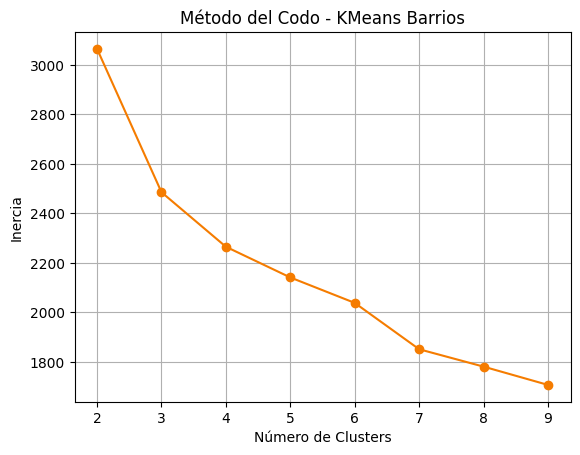

In [ ]:
# --- PASO 4.1: Clustering KMeans para barrios ---

# Filtramos solo los barrios
barrios = df_normalizado[df_normalizado["es_barrio"] == True].copy()
X_barrios = barrios.drop(columns=["zona", "distrito", "es_barrio", 'Índice de Vulnerabilidad Territorial Agregado']).dropna()
barrios = barrios.loc[X_barrios.index]  # sincroniza con las zonas válidas

# Elegimos número de clusters con método del codo (opcional)
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_barrios)
    inertia.append(kmeans.inertia_)

# Visualizamos método del codo
plt.plot(K_range, inertia, marker='o', color='#F57C00')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo - KMeans Barrios")
plt.grid(True)
plt.show()

🔎 Aquí decides cuántos clusters quieres. Por defecto suelen elegirse entre 3 y 6.


## 🧩 Celda PASO 4.2: Aplicar KMeans con k óptimo

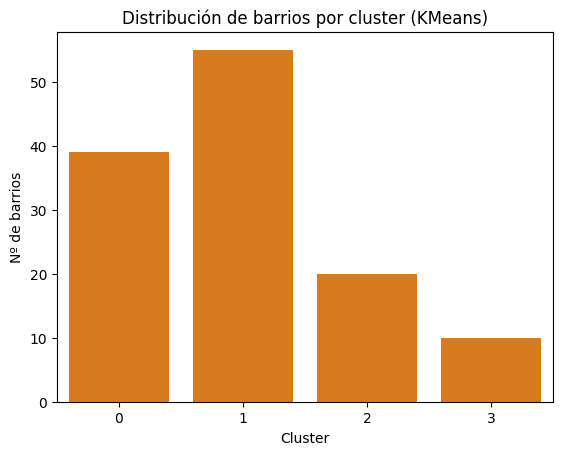


Cluster 0:
['Almenara' 'Valdeacederas' 'Comillas' 'Opañel' 'San Isidro'
 'Vista Alegre' 'Puerta Bonita' 'Abrantes' 'Orcasitas' 'Orcasur'
 'San Fermín' 'Almendrales' 'Moscardó' 'Zofío' 'Pradolongo' 'Entrevías'
 'San Diego' 'Palomeras Bajas' 'Palomeras Sureste' 'Portazgo' 'Numancia'
 'Pavones' 'Media Legua' 'Fontarrón' 'Vinateros' 'Pueblo Nuevo'
 'Villaverde Alto, C.H. Villaverde' 'San Cristóbal' 'Los Rosales'
 'Ángeles' 'Casco Histórico de Vallecas' 'Casco Histórico de Vicálvaro'
 'Valdebernardo' 'Simancas' 'Hellín' 'Amposta' 'Arcos' 'Canillejas'
 'Aeropuerto']

Cluster 1:
['Imperial' 'Acacias' 'Chopera' 'Delicias' 'Palos de la Frontera'
 'Pacífico' 'Adelfas' 'Estrella' 'Ibiza' 'Los Jerónimos' 'Niño Jesús'
 'Recoletos' 'Goya' 'Fuente del Berro' 'Guindalera' 'Lista' 'Castellana'
 'El Viso' 'Prosperidad' 'Ciudad Jardín' 'Hispanoamérica' 'Nueva España'
 'Castilla' 'Cuatro Caminos' 'Castillejos' 'Gaztambide' 'Arapiles'
 'Trafalgar' 'Almagro' 'Ríos Rosas' 'Vallehermoso' 'El Pardo'
 'Fuentel

In [ ]:
# --- Clustering definitivo con KMeans usando k=4 (puedes cambiarlo por 5 si lo prefieres) ---
k4 = 4
kmeans_final_4 = KMeans(n_clusters=k4, random_state=0)
barrios["cluster_kmeans_4"] = kmeans_final_4.fit_predict(X_barrios)

# Visualizar cantidad de barrios por cluster
sns.countplot(x="cluster_kmeans_4", data=barrios, color='#F57C00')
plt.title("Distribución de barrios por cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Nº de barrios")
plt.show()

# Mostrar algunos barrios de cada cluster como ejemplo
for i in range(k4):
    print(f"\nCluster {i}:")
    print(barrios[barrios["cluster_kmeans_4"] == i]["zona"].values)


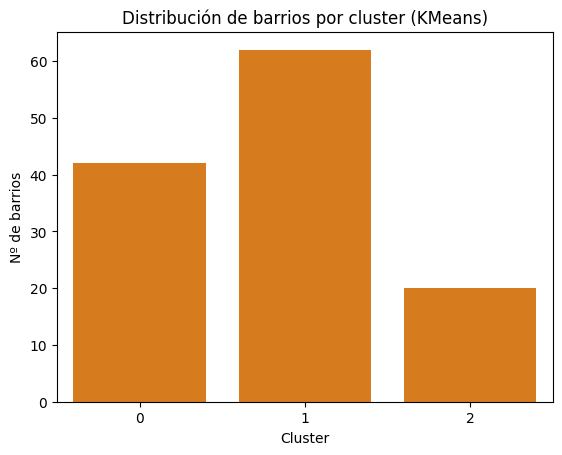


Cluster 0:
['Embajadores' 'Almenara' 'Valdeacederas' 'Berruguete' 'Comillas' 'Opañel'
 'San Isidro' 'Vista Alegre' 'Puerta Bonita' 'Buenavista' 'Abrantes'
 'Orcasitas' 'Orcasur' 'San Fermín' 'Almendrales' 'Moscardó' 'Zofío'
 'Pradolongo' 'Entrevías' 'San Diego' 'Palomeras Bajas'
 'Palomeras Sureste' 'Portazgo' 'Numancia' 'Pavones' 'Media Legua'
 'Fontarrón' 'Vinateros' 'Pueblo Nuevo' 'Villaverde Alto, C.H. Villaverde'
 'San Cristóbal' 'Los Rosales' 'Ángeles' 'Casco Histórico de Vallecas'
 'Casco Histórico de Vicálvaro' 'Valdebernardo' 'Simancas' 'Hellín'
 'Amposta' 'Arcos' 'Canillejas' 'Aeropuerto']

Cluster 1:
['Palacio' 'Cortes' 'Justicia' 'Universidad' 'Sol' 'Imperial' 'Acacias'
 'Chopera' 'Delicias' 'Palos de la Frontera' 'Pacífico' 'Adelfas'
 'Estrella' 'Ibiza' 'Los Jerónimos' 'Niño Jesús' 'Recoletos' 'Goya'
 'Fuente del Berro' 'Guindalera' 'Lista' 'Castellana' 'El Viso'
 'Prosperidad' 'Ciudad Jardín' 'Hispanoamérica' 'Nueva España' 'Castilla'
 'Bellas Vistas' 'Cuatro Caminos' 'C

In [ ]:
# --- Clustering definitivo con KMeans usando k=4 ---
k3 = 3
kmeans_final_3 = KMeans(n_clusters=k3, random_state=0)
barrios["cluster_kmeans_3"] = kmeans_final_3.fit_predict(X_barrios)

# Visualizar cantidad de barrios por cluster
sns.countplot(x="cluster_kmeans_3", data=barrios, color='#F57C00')
plt.title("Distribución de barrios por cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Nº de barrios")
plt.show()

# Mostrar algunos barrios de cada cluster como ejemplo
for i in range(k3):
    print(f"\nCluster {i}:")
    print(barrios[barrios["cluster_kmeans_3"] == i]["zona"].values)

## 🧩 Celda PASO 4.3: DBSCAN

Este gráfico te muestra la distancia al vecino más cercano (k-distance graph) y te ayuda a decidir el eps ideal (se busca el “codo”).

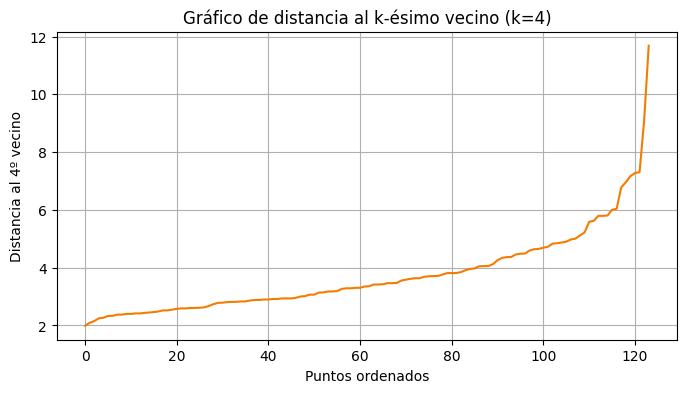

In [ ]:
# --- k-distance graph para afinar eps en DBSCAN ---
from sklearn.neighbors import NearestNeighbors

# Definimos vecinos
vecinos = NearestNeighbors(n_neighbors=4)  # 4 = min_samples habitual
vecinos_fit = vecinos.fit(X_barrios)
distancias, indices = vecinos_fit.kneighbors(X_barrios)

# Ordenamos las distancias al 4º vecino (por eso [:, -1])
dist_ordenadas = np.sort(distancias[:, -1])

# Mostramos gráfico para detectar el "codo"
plt.figure(figsize=(8, 4))
plt.plot(dist_ordenadas, color='#F57C00')
plt.title("Gráfico de distancia al k-ésimo vecino (k=4)")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 4º vecino")
plt.grid(True)
plt.show()

🧠 ¿Cómo usarlo?

Busca el punto donde la curva sube bruscamente (el “codo”).

Ese valor del eje Y será un buen eps.


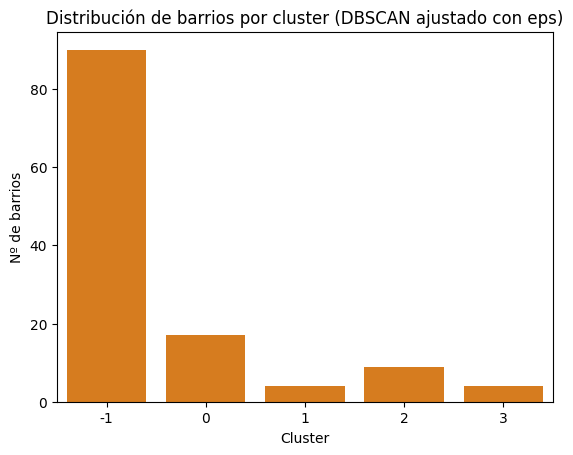


Cluster -1:
['Palacio' 'Embajadores' 'Cortes' 'Justicia' 'Universidad' 'Sol' 'Chopera'
 'Legazpi' 'Atocha' 'Pacífico' 'Ibiza' 'Los Jerónimos' 'Recoletos' 'Goya'
 'Guindalera' 'Castellana' 'Prosperidad' 'Hispanoamérica' 'Nueva España'
 'Bellas Vistas' 'Almenara' 'Valdeacederas' 'Berruguete' 'Almagro'
 'Vallehermoso' 'El Pardo' 'Fuentelarreina' 'La Paz' 'Valverde'
 'Mirasierra' 'El Goloso' 'Casa de Campo' 'Valdezarza' 'Valdemarín'
 'El Plantío' 'Aravaca' 'Comillas' 'Buenavista' 'Orcasitas' 'Orcasur'
 'San Fermín' 'Moscardó' 'Pradolongo' 'Entrevías' 'San Diego'
 'Palomeras Bajas' 'Palomeras Sureste' 'Portazgo' 'Pavones' 'Horcajo'
 'Marroquina' 'Media Legua' 'Fontarrón' 'Vinateros' 'Ventas'
 'Pueblo Nuevo' 'Quintana' 'La Concepción' 'San Pascual'
 'San Juan Bautista' 'Colina' 'Atalaya' 'Palomas' 'Piovera'
 'Apóstol Santiago' 'Valdefuentes' 'Villaverde Alto, C.H. Villaverde'
 'San Cristóbal' 'Butarque' 'Los Rosales' 'Casco Histórico de Vallecas'
 'Santa Eugenia' 'Ensanche de Vallecas' 'Cas

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN con valor óptimo de eps según el gráfico
dbscan = DBSCAN(eps=2.5, min_samples=4)
barrios["cluster_dbscan"] = dbscan.fit_predict(X_barrios)

# Visualizamos
sns.countplot(x="cluster_dbscan", data=barrios, color='#F57C00')
plt.title("Distribución de barrios por cluster (DBSCAN ajustado con eps)")
plt.xlabel("Cluster")
plt.ylabel("Nº de barrios")
plt.show()

# Ver qué hay en cada cluster
for label in sorted(barrios["cluster_dbscan"].unique()):
    print(f"\nCluster {label}:")
    print(barrios[barrios["cluster_dbscan"] == label]["zona"].values)

In [ ]:
for label in sorted(barrios["cluster_dbscan"].unique()):
    print(f"\nCluster {label}:")
    print(barrios[barrios["cluster_dbscan"] == label]["zona"].nunique())


Cluster -1:
90

Cluster 0:
17

Cluster 1:
4

Cluster 2:
9

Cluster 3:
4


🔧 Puedes ajustar eps y min_samples si salen muchos -1 (ruido).

A pesar de probar distintos valores de eps y min_samples, el modelo DBSCAN sigue clasificando una parte considerable de los barrios como ruido (-1). Esto indica que la densidad de los datos no se ajusta bien a esta técnica, por lo que se descarta como opción principal para construir un ranking de vulnerabilidad.

## 🧩 Celda PASO 4.4: Agglomerative Clustering

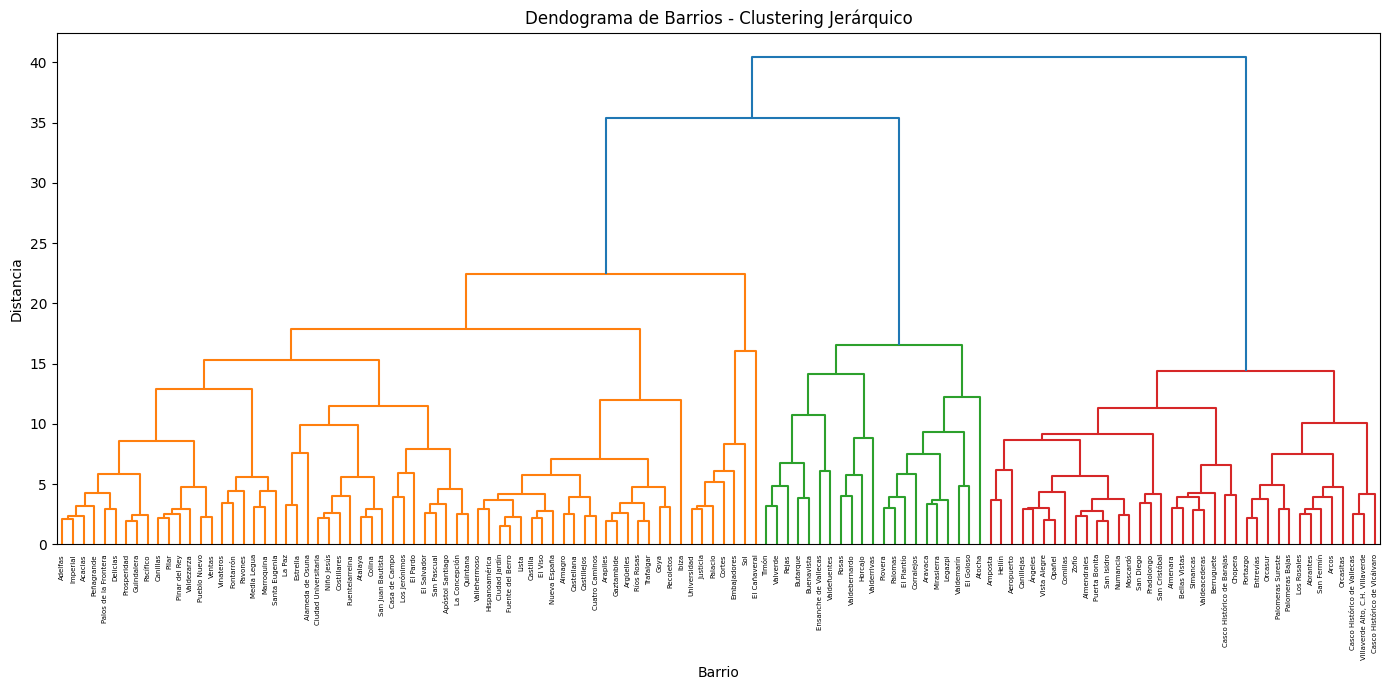

In [ ]:
# 📈 Dendograma para visualización jerárquica
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

# Calculamos las distancias y el linkage
linked = linkage(X_barrios, method='ward')  # 'ward' minimiza la varianza dentro de los clusters

# Etiquetas para los barrios
etiquetas = barrios["zona"].values

# Plot del dendrograma
plt.figure(figsize=(14, 7))
dendrogram(linked,
           labels=etiquetas,
           orientation='top',
           distance_sort='descending',
           leaf_rotation=90)
plt.title("Dendograma de Barrios - Clustering Jerárquico")
plt.xlabel("Barrio")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

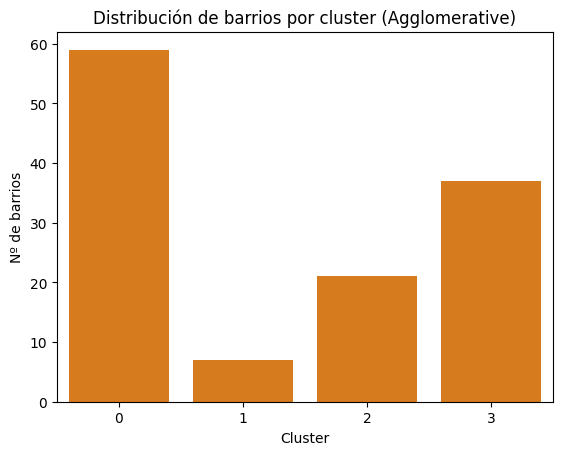


Cluster 0:
['Imperial' 'Acacias' 'Delicias' 'Palos de la Frontera' 'Pacífico'
 'Adelfas' 'Estrella' 'Ibiza' 'Los Jerónimos' 'Niño Jesús' 'Recoletos'
 'Goya' 'Fuente del Berro' 'Guindalera' 'Lista' 'Castellana' 'El Viso'
 'Prosperidad' 'Ciudad Jardín' 'Hispanoamérica' 'Nueva España' 'Castilla'
 'Cuatro Caminos' 'Castillejos' 'Gaztambide' 'Arapiles' 'Trafalgar'
 'Almagro' 'Ríos Rosas' 'Vallehermoso' 'El Pardo' 'Fuentelarreina'
 'Peñagrande' 'Pilar' 'La Paz' 'Casa de Campo' 'Argüelles'
 'Ciudad Universitaria' 'Valdezarza' 'Pavones' 'Marroquina' 'Media Legua'
 'Fontarrón' 'Vinateros' 'Ventas' 'Pueblo Nuevo' 'Quintana'
 'La Concepción' 'San Pascual' 'San Juan Bautista' 'Colina' 'Atalaya'
 'Costillares' 'Canillas' 'Pinar del Rey' 'Apóstol Santiago'
 'Santa Eugenia' 'El Salvador' 'Alameda de Osuna']

Cluster 1:
['Palacio' 'Embajadores' 'Cortes' 'Justicia' 'Universidad' 'Sol'
 'El Cañaveral']

Cluster 2:
['Legazpi' 'Atocha' 'Valverde' 'Mirasierra' 'El Goloso' 'Valdemarín'
 'El Plantío' 'Arava

In [ ]:
# --- Agglomerative Clustering para barrios ---
agg4 = AgglomerativeClustering(n_clusters=4)  # cambia 4 por el nº que quieras probar
barrios["cluster_agglom_4"] = agg4.fit_predict(X_barrios)

# Visualizamos resultados
sns.countplot(x="cluster_agglom_4", data=barrios, color='#F57C00')
plt.title("Distribución de barrios por cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Nº de barrios")
plt.show()

# Mostrar contenido de cada cluster
for i in sorted(barrios["cluster_agglom_4"].unique()):
    print(f"\nCluster {i}:")
    print(barrios[barrios["cluster_agglom_4"] == i]["zona"].values)

In [ ]:
for i in sorted(barrios["cluster_agglom_4"].unique()):
    print(f"\nCluster {i}:")
    print(barrios[barrios["cluster_agglom_4"] == i]["zona"].nunique())


Cluster 0:
59

Cluster 1:
7

Cluster 2:
21

Cluster 3:
37


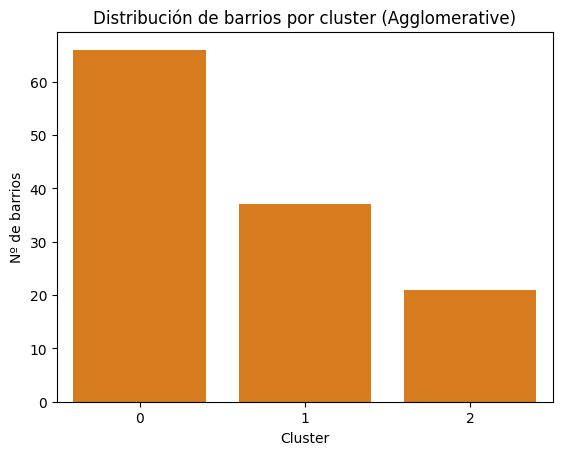


Cluster 0:
['Palacio' 'Embajadores' 'Cortes' 'Justicia' 'Universidad' 'Sol'
 'Imperial' 'Acacias' 'Delicias' 'Palos de la Frontera' 'Pacífico'
 'Adelfas' 'Estrella' 'Ibiza' 'Los Jerónimos' 'Niño Jesús' 'Recoletos'
 'Goya' 'Fuente del Berro' 'Guindalera' 'Lista' 'Castellana' 'El Viso'
 'Prosperidad' 'Ciudad Jardín' 'Hispanoamérica' 'Nueva España' 'Castilla'
 'Cuatro Caminos' 'Castillejos' 'Gaztambide' 'Arapiles' 'Trafalgar'
 'Almagro' 'Ríos Rosas' 'Vallehermoso' 'El Pardo' 'Fuentelarreina'
 'Peñagrande' 'Pilar' 'La Paz' 'Casa de Campo' 'Argüelles'
 'Ciudad Universitaria' 'Valdezarza' 'Pavones' 'Marroquina' 'Media Legua'
 'Fontarrón' 'Vinateros' 'Ventas' 'Pueblo Nuevo' 'Quintana'
 'La Concepción' 'San Pascual' 'San Juan Bautista' 'Colina' 'Atalaya'
 'Costillares' 'Canillas' 'Pinar del Rey' 'Apóstol Santiago'
 'Santa Eugenia' 'El Cañaveral' 'El Salvador' 'Alameda de Osuna']

Cluster 1:
['Chopera' 'Bellas Vistas' 'Almenara' 'Valdeacederas' 'Berruguete'
 'Comillas' 'Opañel' 'San Isidro' 'V

In [ ]:
# --- Agglomerative Clustering para barrios ---
agg3 = AgglomerativeClustering(n_clusters=3)
barrios["cluster_agglom_3"] = agg3.fit_predict(X_barrios)

# Visualizamos resultados
sns.countplot(x="cluster_agglom_3", data=barrios, color='#F57C00')
plt.title("Distribución de barrios por cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Nº de barrios")
plt.show()

# Mostrar contenido de cada cluster
for i in sorted(barrios["cluster_agglom_3"].unique()):
    print(f"\nCluster {i}:")
    print(barrios[barrios["cluster_agglom_3"] == i]["zona"].values)

In [ ]:
for i in sorted(barrios["cluster_agglom_3"].unique()):
    print(f"\nCluster {i}:")
    print(barrios[barrios["cluster_agglom_3"] == i]["zona"].nunique())


Cluster 0:
66

Cluster 1:
37

Cluster 2:
21


# 🔹 PASO 5: Función para generar ranking desde cualquier modelo

## 🧩 Celda: Función generar_ranking por modelo

In [ ]:
def etiquetar_vulnerabilidad(valor):
    if valor == 1:
        return "Muy vulnerable"
    elif valor == 2:
        return "Vulnerable"
    elif valor == 3:
        return "Poco vulnerable"
    elif valor == 4:
        return "Muy poco vulnerable"

def generar_ranking(df, X_base, nombre_columna_cluster):
    temp = X_base.copy()
    temp[nombre_columna_cluster] = df[nombre_columna_cluster].values
    temp = temp[temp[nombre_columna_cluster] != -1]

    media_por_cluster = temp.groupby(nombre_columna_cluster).mean().mean(axis=1).sort_values(ascending=False)
    ranking_clusters = {cluster: rank+1 for rank, cluster in enumerate(media_por_cluster.index)}

    col_ranking = f"ranking_{nombre_columna_cluster}"
    col_categoria = f"categoria_{nombre_columna_cluster}"

    df[col_ranking] = df[nombre_columna_cluster].map(ranking_clusters)
    df[col_categoria] = df[col_ranking].map(etiquetar_vulnerabilidad)

    resultado = df[["zona", "distrito", nombre_columna_cluster, col_ranking, col_categoria]].sort_values(col_ranking)
    return resultado

## 🧩 Celda: Aplicar a los tres modelos

In [ ]:
# Aplicamos la función a cada modelo
ranking_kmeans_4 = generar_ranking(barrios, X_barrios, "cluster_kmeans_4")
ranking_kmeans_3 = generar_ranking(barrios, X_barrios, "cluster_kmeans_3")
ranking_dbscan = generar_ranking(barrios, X_barrios, "cluster_dbscan")
ranking_agglom_4 = generar_ranking(barrios, X_barrios, "cluster_agglom_4")
ranking_agglom_3 = generar_ranking(barrios, X_barrios, "cluster_agglom_3")

# Visualizamos los primeros de cada ranking
# print("🏅 Top barrios más vulnerables según KMeans k=4:")
# display(ranking_kmeans_4)

print("🏅 Top barrios más vulnerables según KMeans k=3:")
display(ranking_kmeans_3)

# print("🏅 Top barrios más vulnerables según DBSCAN:")
# display(ranking_dbscan)

# print("🏅 Top barrios más vulnerables según Agglomerative k=4:")
# display(ranking_agglom_4)

# print("🏅 Top barrios más vulnerables según Agglomerative k=3:")
# display(ranking_agglom_3)

🏅 Top barrios más vulnerables según KMeans k=3:


VARIABLES ESCOGIDAS/ZONA,zona,distrito,cluster_kmeans_3,ranking_cluster_kmeans_3,categoria_cluster_kmeans_3
2,Embajadores,CENTRO,0,1,Muy vulnerable
78,Vista Alegre,CARABANCHEL,0,1,Muy vulnerable
80,Buenavista,CARABANCHEL,0,1,Muy vulnerable
79,Puerta Bonita,CARABANCHEL,0,1,Muy vulnerable
75,Comillas,CARABANCHEL,0,1,Muy vulnerable
...,...,...,...,...,...
124,Butarque,VILLAVERDE,2,3,Poco vulnerable
142,Rejas,SAN BLAS-CANILLEJAS,2,3,Poco vulnerable
141,Rosas,SAN BLAS-CANILLEJAS,2,3,Poco vulnerable
149,Timón,BARAJAS,2,3,Poco vulnerable


In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=ranking_kmeans_3)

## 🧩 Celda: PCA + visualización por modelo

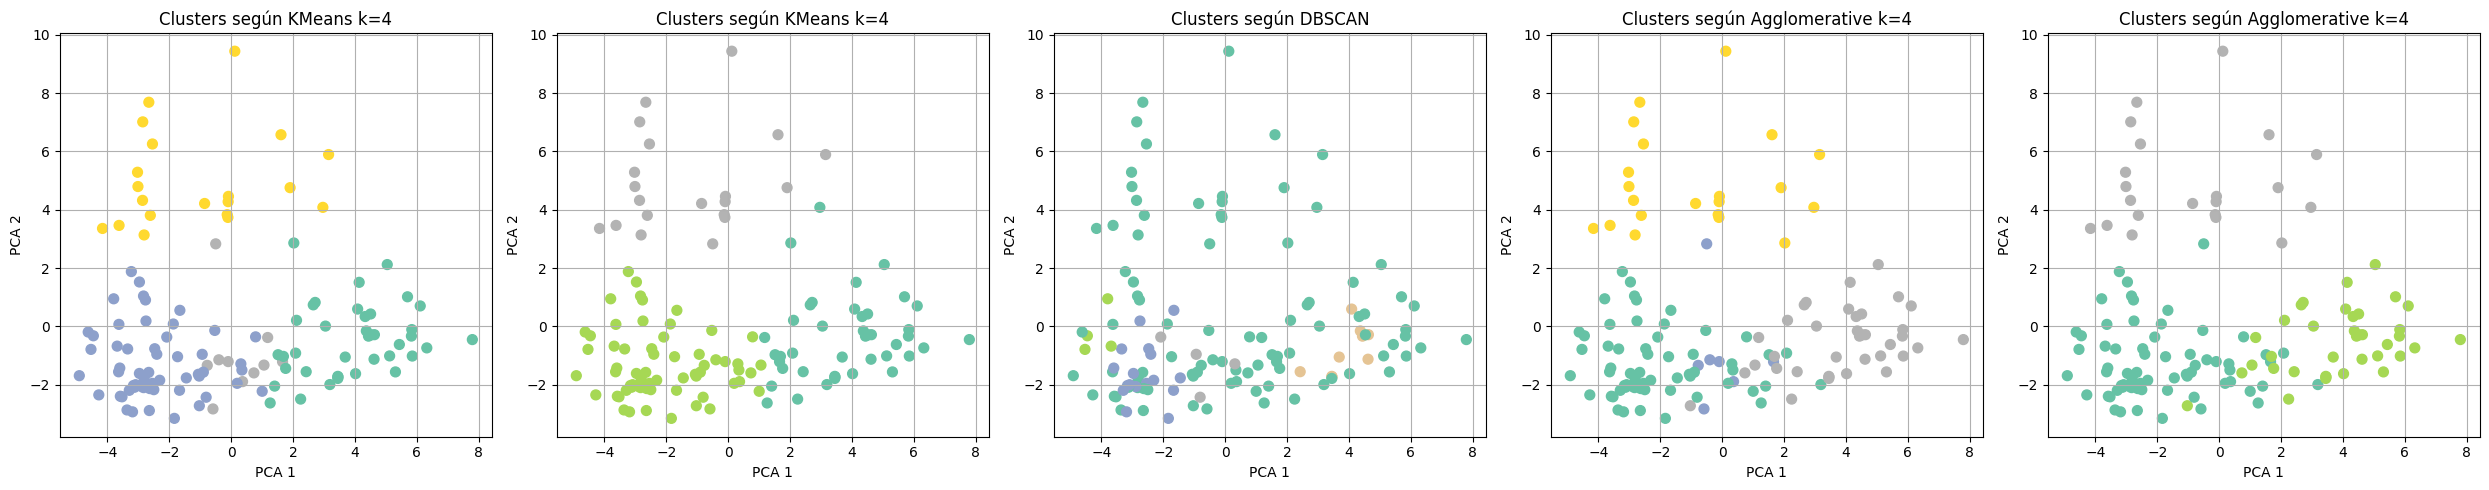

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicamos PCA a los datos normalizados
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_barrios)

# Añadimos los componentes al DataFrame de barrios
barrios["PCA1"] = X_pca[:, 0]
barrios["PCA2"] = X_pca[:, 1]

# Visualización de cada modelo
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

modelos = ["cluster_kmeans_4", "cluster_kmeans_3", "cluster_dbscan", "cluster_agglom_4", "cluster_agglom_3"]
titulos = ["KMeans k=4", "KMeans k=4", "DBSCAN", "Agglomerative k=4", "Agglomerative k=4"]

for i, modelo in enumerate(modelos):
    axs[i].scatter(barrios["PCA1"], barrios["PCA2"],
                   c=barrios[modelo], cmap="Set2", s=50)
    axs[i].set_title(f"Clusters según {titulos[i]}")
    axs[i].set_xlabel("PCA 1")
    axs[i].set_ylabel("PCA 2")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza explicada acumulada:", pca.explained_variance_ratio_.cumsum())

Varianza explicada por cada componente: [0.30874539 0.20379695 0.12247269 0.09349748 0.05611165 0.04172085]
Varianza explicada acumulada: [0.30874539 0.51254234 0.63501503 0.72851251 0.78462416 0.82634501]


In [ ]:
# Cada fila: componente principal
# Cada columna: variable original
print("Matriz de pesos (componentes principales):")
print(pca.components_)

Matriz de pesos (componentes principales):
[[ 4.83337210e-02 -9.64093719e-02 -4.31827959e-05 -1.35953384e-01
   1.02428152e-01 -1.72081556e-01 -2.20570070e-01  2.18397678e-01
   5.11578305e-02 -2.98867770e-02 -7.27505905e-02  8.44085719e-02
   8.63154717e-02  2.74280749e-01  3.01377899e-01 -3.51560193e-02
  -1.90992877e-02 -4.05891847e-02  6.17434229e-02  2.91815436e-01
   2.95041284e-01  3.09873623e-01  1.01844337e-01 -2.57633938e-01
  -2.98523641e-01  1.68716397e-01 -6.91419540e-02  2.75055780e-01
   3.06352735e-01 -9.57186573e-03]
 [ 8.43504299e-03 -3.19498018e-01  3.49587562e-01 -2.92486872e-01
  -2.04250424e-01 -6.82561210e-02  1.08596552e-01 -1.35956148e-01
   5.34792509e-04 -3.45333821e-01 -3.43353597e-01  3.33474315e-01
  -3.66608071e-02 -1.36068285e-02  1.61775122e-02 -2.47958557e-01
  -2.47554052e-01  1.82286934e-01  2.30497271e-01 -3.60947469e-02
  -8.32910530e-02 -3.78913129e-02  4.43883075e-02  1.68116825e-01
   2.23862676e-02  2.89212194e-02 -1.06293274e-01 -2.77525067e-0

In [ ]:
import pandas as pd

# Suponiendo que X_distritos.columns es el nombre de tus variables originales
cargas = pd.DataFrame(
    pca.components_,
    columns=X_barrios.columns,
    index=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']
)

display(cargas.T)  # Transpuesto para ver cada variable con sus pesos

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
VARIABLES ESCOGIDAS/ZONA,,,,,,
Número Habitantes,0.048334,0.008435,-0.062908,0.505426,0.069316,0.187477
Edad media de la población,-0.096409,-0.319498,-0.258391,-0.041938,0.154300,-0.009790
Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),-0.000043,0.349588,-0.019981,0.003991,-0.363821,0.015214
Porcentaje de envejecimiento (Población mayor de 65 años/Población total),-0.135953,-0.292487,-0.274384,-0.026259,-0.002392,-0.016741
Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),0.102428,-0.204250,-0.147571,-0.118966,-0.283361,0.212976
Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),-0.172082,-0.068256,-0.324010,-0.022656,-0.269455,-0.067783
Personas con nacionalidad española,-0.220570,0.108597,-0.300543,0.001567,0.034676,-0.146616
Personas con nacionalidad extranjera,0.218398,-0.135956,0.252158,-0.034153,0.008414,0.265997
Total hogares,0.051158,0.000535,-0.061544,0.490077,0.083410,0.165723


👀 Comparación visual rápida:
KMeans → Clusters bastante bien definidos y compactos. Hay separación clara.

DBSCAN → Caos. Muchos puntos sin asignar o agrupaciones débiles → como sospechábamos, no es útil aquí.

Agglomerative → Muy parecido a KMeans, también con buena separación.

## 🔹 PASO FINAL COMPARATIVO: Calcular Silhouette Score y Calinski Harabasz Score

Esto te da un valor entre -1 y 1 que mide qué tan bien separados están los clusters. Cuanto más alto, mejor.

### 🧩 Celda: calcular silhouette_score por modelo

In [ ]:
from sklearn.metrics import silhouette_score

# Función auxiliar para filtrar los -1 (ruido) en DBSCAN
def score_silhouette(X, etiquetas):
    mask = etiquetas #!= -1
    return silhouette_score(X[mask], etiquetas[mask]) if len(set(etiquetas[mask])) > 1 else -1

# Calculamos silhouette para cada modelo
score_kmeans_4 = silhouette_score(X_barrios, barrios["cluster_kmeans_4"])
score_kmeans_3 = silhouette_score(X_barrios, barrios["cluster_kmeans_3"])
score_dbscan = score_silhouette(X_barrios.values, barrios["cluster_dbscan"].values)
score_agglom_4 = silhouette_score(X_barrios, barrios["cluster_agglom_4"])
score_agglom_3 = silhouette_score(X_barrios, barrios["cluster_agglom_3"])

# Mostramos resultados
print("Silhouette Score KMeans k=4 barrios:    ", round(score_kmeans_4, 25))
print("Silhouette Score KMeans K=3 barrios:    ", round(score_kmeans_4, 25))
print("Silhouette Score DBSCAN barrios:       ", round(score_dbscan, 3))
print("Silhouette Score Agglomerative k=4 barrios:", round(score_agglom_4, 10))
print("Silhouette Score Agglomerative k=3 barrios:", round(score_agglom_4, 10))

Silhouette Score KMeans k=4 barrios:     0.2551682508067434
Silhouette Score KMeans K=3 barrios:     0.2551682508067434
Silhouette Score DBSCAN barrios:        -1
Silhouette Score Agglomerative k=4 barrios: 0.2538274486
Silhouette Score Agglomerative k=3 barrios: 0.2538274486


### 🧩 Celda: calcular calinski_harabasz_score por modelo

In [ ]:
from sklearn.metrics import calinski_harabasz_score

score_kmeans_4 = calinski_harabasz_score(X_barrios, barrios["cluster_kmeans_4"])
score_kmeans_3 = calinski_harabasz_score(X_barrios, barrios["cluster_kmeans_3"])
score_agglom_4 = calinski_harabasz_score(X_barrios, barrios["cluster_agglom_4"])
score_agglom_3 = calinski_harabasz_score(X_barrios, barrios["cluster_agglom_3"])
# DBSCAN solo si tiene varios clusters válidos (evitar si muchos -1)

print("CHS KMeans k=4 barrios:", score_kmeans_4)
print("CHS KMeans k=3 barrios:", score_kmeans_3)
print("CHS Agglomerative k=4 barrios:", score_agglom_4)
print("CHS Agglomerative k=3 barrios:", score_agglom_3)


CHS KMeans k=4 barrios: 31.088741307529727
CHS KMeans k=3 barrios: 37.49532451868842
CHS Agglomerative k=4 barrios: 29.092984810746128
CHS Agglomerative k=3 barrios: 33.793416793717086


# 🔍 OPCIÓN 1: Ver importancia de cada variable según el centroide de cada cluster

Esto te dice qué tan distinto es el valor medio de cada variable en cada cluster. Es útil para entender qué distingue a los grupos.

In [ ]:
# Obtenemos los centroides del modelo KMeans
centroides_3 = pd.DataFrame(kmeans_final_3.cluster_centers_,
                          columns=X_barrios.columns)

# Transponemos para verlo mejor
centroides_transpuestos_3 = centroides_3.T

Para cuantificar qué variables han influido más en la clasificación de KMeans, puedes calcular la varianza de cada variable entre los centroides. Eso te da un ranking objetivo.

/tmp/ipython-input-49-1502425506.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


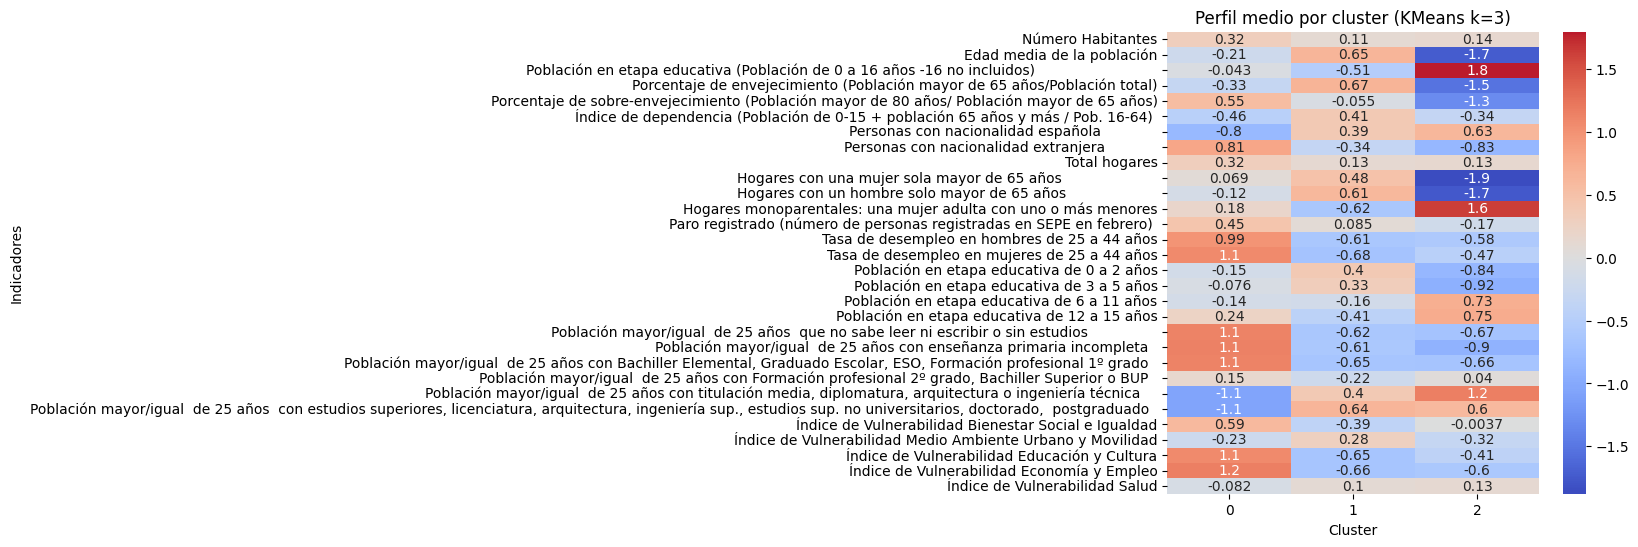

In [ ]:
# Visualización centroides KMeans k=3
plt.figure(figsize=(6, 6))
sns.heatmap(centroides_transpuestos_3, annot=True, cmap="coolwarm", center=0)
plt.title("Perfil medio por cluster (KMeans k=3)")
plt.xlabel("Cluster")
plt.ylabel("Indicadores")
plt.tight_layout()
plt.show()

In [ ]:
# Calculamos la varianza entre clusters para cada variable
import pandas as pd

variabilidad_3 = centroides_3.var(axis=0).sort_values(ascending=False)


# Mostramos el ranking
print("Variables que más han influido en el clustering k=3 (por varianza entre centroides):")
display(variabilidad_3.head(15))

Variables que más han influido en el clustering k=3 (por varianza entre centroides):


,0
VARIABLES ESCOGIDAS/ZONA,
Hogares con una mujer sola mayor de 65 años,1.589944
Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),1.489920
Hogares con un hombre solo mayor de 65 años,1.459464
Edad media de la población,1.436096
Hogares monoparentales: una mujer adulta con uno o más menores,1.300382
"Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica",1.281659
Población mayor/igual de 25 años con enseñanza primaria incompleta,1.221471
Porcentaje de envejecimiento (Población mayor de 65 años/Población total),1.204673
Índice de Vulnerabilidad Economía y Empleo,1.066929


Cuanto mayor es la varianza de una variable entre los centroides → más ha contribuido a diferenciar los clusters.

Si quieres puedes convertir esto en gráfico de barras horizontal con:

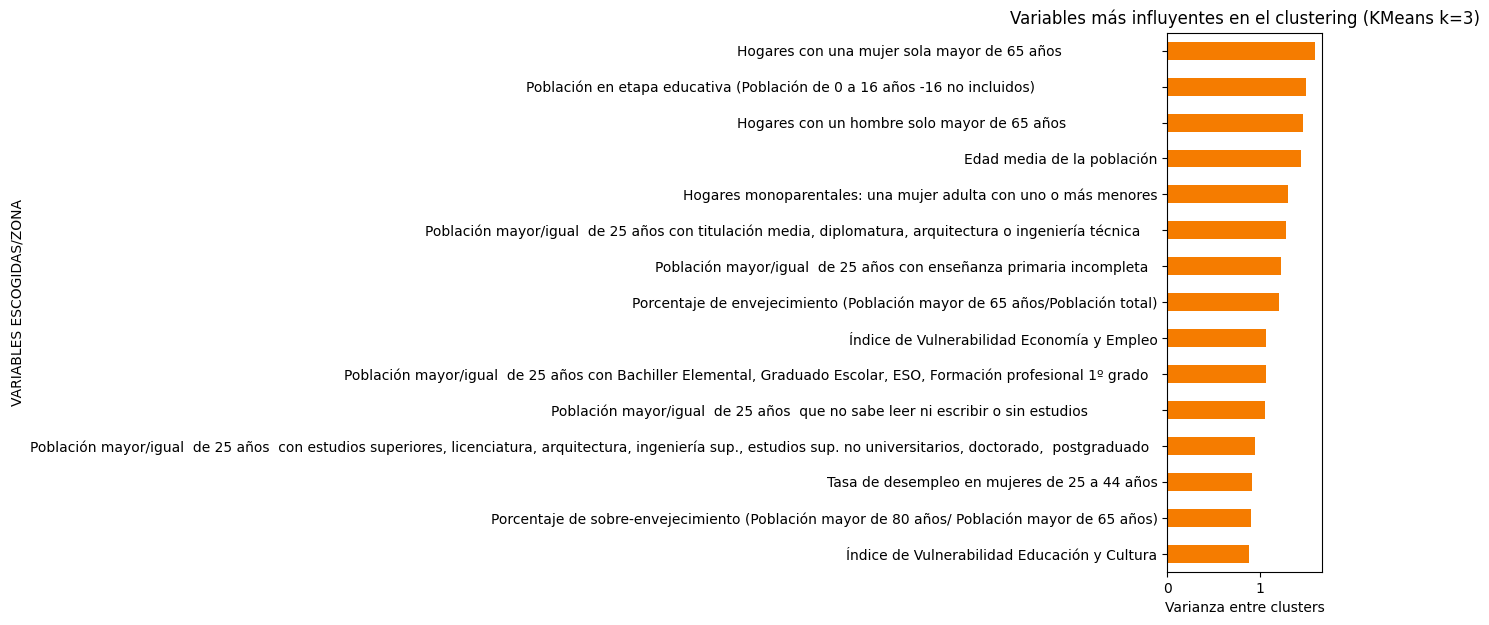

In [ ]:
variabilidad_3.head(15).plot(kind='barh', figsize=(2,7), color='#F57C00')
plt.gca().invert_yaxis()
plt.title("Variables más influyentes en el clustering (KMeans k=3)")
plt.xlabel("Varianza entre clusters")
plt.show()

📌 Análisis de los Indicadores más Influyentes en la Agrupación KMeans
Dado que el Silhouette Score de KMeans (0.264) fue superior al de DBSCAN y Agglomerative, tomamos como referencia los centroides del modelo KMeans para caracterizar los perfiles de vulnerabilidad.

A continuación, se resumen los indicadores que más han influido en la formación de los clusters, seleccionando aquellos con mayores diferencias absolutas entre centroides:

🧠 Interpretación del perfil de clusters
Cluster 0: Alta vulnerabilidad socioeconómica
Alta tasa de paro (especialmente en hombres).

Alta demanda de servicios sociales (índices de salud, empleo).

Población con bajos niveles educativos.

Cluster 1: Perfil envejecido y más desfavorecido estructuralmente
Edad media más alta, hogares con mayores solos.

Bajo porcentaje de población en edad educativa.

Alta dependencia y vulnerabilidad asistencial.

Bajo nivel de estudios superiores.

Cluster 2: Perfil más favorecido
Alta formación académica.

Menor desempleo.

Edad media más joven y menor sobreenvejecimiento.

In [ ]:
# Primero asignamos los centroides al dataframe
barrios['cluster_kmeans_3'] = kmeans_final_3.labels_

# Calculamos los perfiles medios de cada cluster
centroides_barrios_k3 = X_barrios.copy()
centroides_barrios_k3['cluster'] = barrios['cluster_kmeans_3']
centroides_medias_k3 = centroides_barrios_k3.groupby('cluster').mean()

# Ahora extraemos las 5 variables más altas en cada cluster
for cluster in centroides_medias_k3.index:
    print(f"\nVariables más influyentes en el Cluster {cluster}:")
    top_variables = centroides_medias_k3.loc[cluster].sort_values(ascending=False)
    display(top_variables)


Variables más influyentes en el Cluster 0:


,0
VARIABLES ESCOGIDAS/ZONA,
Índice de Vulnerabilidad Economía y Empleo,1.158459
Población mayor/igual de 25 años con enseñanza primaria incompleta,1.144439
"Población mayor/igual de 25 años con Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado",1.129106
Población mayor/igual de 25 años que no sabe leer ni escribir o sin estudios,1.127326
Índice de Vulnerabilidad Educación y Cultura,1.075793
Tasa de desempleo en mujeres de 25 a 44 años,1.070755
Tasa de desempleo en hombres de 25 a 44 años,0.987079
Personas con nacionalidad extranjera,0.812990
Índice de Vulnerabilidad Bienestar Social e Igualdad,0.593285



Variables más influyentes en el Cluster 1:


,1
VARIABLES ESCOGIDAS/ZONA,
Porcentaje de envejecimiento (Población mayor de 65 años/Población total),0.668286
Edad media de la población,0.646553
"Población mayor/igual de 25 años con estudios superiores, licenciatura, arquitectura, ingeniería sup., estudios sup. no universitarios, doctorado, postgraduado",0.643985
Hogares con un hombre solo mayor de 65 años,0.612137
Hogares con una mujer sola mayor de 65 años,0.484536
Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),0.405111
Población en etapa educativa de 0 a 2 años,0.399493
"Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica",0.398414
Personas con nacionalidad española,0.392287



Variables más influyentes en el Cluster 2:


,2
VARIABLES ESCOGIDAS/ZONA,
Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),1.798845
Hogares monoparentales: una mujer adulta con uno o más menores,1.626962
"Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica",1.155477
Población en etapa educativa de 12 a 15 años,0.753173
Población en etapa educativa de 6 a 11 años,0.731902
Personas con nacionalidad española,0.625313
"Población mayor/igual de 25 años con estudios superiores, licenciatura, arquitectura, ingeniería sup., estudios sup. no universitarios, doctorado, postgraduado",0.595834
Número Habitantes,0.139543
Total hogares,0.133469


# MAPA K-MEANS

https://mapshaper.org/

In [ ]:
!pip install geopandas folium branca

In [ ]:
# Cargar el GeoJSON de barrios
jsonbarrios = files.upload()

In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from branca.colormap import linear
from branca.colormap import LinearColormap

# Cargar el GeoJSON
geo_barrios = gpd.read_file("Barrios.json")
# 🔧 Asignar sistema de coordenadas WGS84 (EPSG:4326)
geo_barrios.set_crs(epsg=4326, inplace=True)

# Preparamos el dataframe con ranking y categoría
# Asegurarte de que los nombres coinciden
ranking_kmeans_renamed_4 = ranking_kmeans_4.rename(columns={'zona': 'BARRIO_MT'})
ranking_kmeans_renamed_4['BARRIO_MT'] = ranking_kmeans_renamed_4['BARRIO_MT'].str.upper()

# Merge
geo_merged_kmeans_4 = geo_barrios.merge(ranking_kmeans_renamed_4, on='BARRIO_MT', how='left')
geo_merged_kmeans_4 = geo_merged_kmeans_4[geo_merged_kmeans_4['ranking_cluster_kmeans_4'].notna()]

# Unir los datos
geo_merged_kmeans_4 = geo_barrios.merge(ranking_kmeans_renamed_4, on='BARRIO_MT', how='left')

# Asegurarte de que los nombres coinciden
ranking_kmeans_renamed_3 = ranking_kmeans_3.rename(columns={'zona': 'BARRIO_MT'})
ranking_kmeans_renamed_3['BARRIO_MT'] = ranking_kmeans_renamed_3['BARRIO_MT'].str.upper()

# Unir los datos
geo_merged_kmeans_3 = geo_barrios.merge(ranking_kmeans_renamed_3, on='BARRIO_MT', how='left')

In [ ]:
geo_merged_kmeans_4 = geo_merged_kmeans_4[geo_merged_kmeans_4['ranking_cluster_kmeans_4'].notna()]

geo_merged_kmeans_3 = geo_merged_kmeans_3[geo_merged_kmeans_3['ranking_cluster_kmeans_3'].notna()]

In [ ]:
# Crear mapa base
mk4 = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged_kmeans_4['ranking_cluster_kmeans_4'].min(),
    vmax=geo_merged_kmeans_4['ranking_cluster_kmeans_4'].max(),
    caption="Categoría de Vulnerabilidad por Barrio (KMeans k=4)"
)

# Tooltip modificado con la categoría
geo_merged_kmeans_4['tooltip'] = (
    "<b>" + geo_merged_kmeans_4['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged_kmeans_4['categoria_cluster_kmeans_4'] + "</b>"
)

# Añadir capa GeoJson
folium.GeoJson(
    geo_merged_kmeans_4,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_kmeans_4']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(mk4)

# Añadir leyenda
colormap.add_to(mk4)

# Mostrar mapa
mk4

In [ ]:
mk4.save("mapa_vulnerabilidad_barrios_kmeans_k4.html")

In [ ]:
# Crear mapa base
mk3 = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged_kmeans_3['ranking_cluster_kmeans_3'].min(),
    vmax=geo_merged_kmeans_3['ranking_cluster_kmeans_3'].max(),
    caption="Categoría de Vulnerabilidad por Barrio (KMeans k=3)"
)

# Tooltip modificado con la categoría
geo_merged_kmeans_3['tooltip'] = (
    "<b>" + geo_merged_kmeans_3['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged_kmeans_3['categoria_cluster_kmeans_3'] + "</b>"
)

# Añadir capa GeoJson
folium.GeoJson(
    geo_merged_kmeans_3,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_kmeans_3']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(mk3)

# Añadir leyenda
colormap.add_to(mk3)

# Mostrar mapa
mk3

In [ ]:
mk3.save("mapa_vulnerabilidad_barrios_kmeans_k3.html")

# MAPA AGGLOMERATIVE

In [ ]:
# Asegurarte de que los nombres coinciden
ranking_agglom_renamed_4 = ranking_agglom_4.rename(columns={'zona': 'BARRIO_MT'})
ranking_agglom_renamed_4['BARRIO_MT'] = ranking_agglom_renamed_4['BARRIO_MT'].str.upper()

# Unir los datos
geo_merged_ag_4 = geo_barrios.merge(ranking_agglom_renamed_4, on='BARRIO_MT', how='left')

# Asegurarte de que los nombres coinciden
ranking_agglom_renamed_3 = ranking_agglom_3.rename(columns={'zona': 'BARRIO_MT'})
ranking_agglom_renamed_3['BARRIO_MT'] = ranking_agglom_renamed_3['BARRIO_MT'].str.upper()

# Unir los datos
geo_merged_ag_3 = geo_barrios.merge(ranking_agglom_renamed_3, on='BARRIO_MT', how='left')

In [ ]:
geo_merged_ag_4 = geo_merged_ag_4[geo_merged_ag_4['ranking_cluster_agglom_4'].notna()]

geo_merged_ag_3 = geo_merged_ag_3[geo_merged_ag_3['ranking_cluster_agglom_3'].notna()]

In [ ]:
# Crear mapa base
magk4 = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged_ag_4['ranking_cluster_agglom_4'].min(),
    vmax=geo_merged_ag_4['ranking_cluster_agglom_4'].max(),
    caption="Categoría de Vulnerabilidad por Barrio (Agglomerative k=4)"
)

# Tooltip modificado con la categoría
geo_merged_ag_4['tooltip'] = (
    "<b>" + geo_merged_ag_4['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged_ag_4['categoria_cluster_agglom_4'] + "</b>"
)

# Añadir capa GeoJson
folium.GeoJson(
    geo_merged_ag_4,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_agglom_4']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(magk4)

# Añadir leyenda
colormap.add_to(magk4)

# Mostrar mapa
magk4

In [ ]:
magk4.save("mapa_vulnerabilidad_barrios_agg_k4.html")

In [ ]:
# Crear mapa base
magk3 = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged_ag_3['ranking_cluster_agglom_3'].min(),
    vmax=geo_merged_ag_3['ranking_cluster_agglom_3'].max(),
    caption="Categoría de Vulnerabilidad por Barrio (Agglomerative k=3)"
)

# Tooltip modificado con la categoría
geo_merged_ag_3['tooltip'] = (
    "<b>" + geo_merged_ag_3['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged_ag_3['categoria_cluster_agglom_3'] + "</b>"
)

# Añadir capa GeoJson
folium.GeoJson(
    geo_merged_ag_3,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_agglom_3']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(magk3)

# Añadir leyenda
colormap.add_to(magk3)

# Mostrar mapa
magk3

In [ ]:
magk3.save("mapa_vulnerabilidad_barrios_agg_k3.html")

# MAPA DBSCAN

In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from branca.colormap import linear

# Cargar el GeoJSON
geo_distritos = gpd.read_file("Barrios.json")

# Asignar sistema de coordenadas WGS84 (por si no lo tiene)
geo_distritos.set_crs(epsg=4326, inplace=True)

# Asegurarte de que los nombres coinciden
geo_distritos['NOMBRE'] = geo_distritos['NOMBRE'].str.replace(r'\s*-\s*', '-', regex=True).str.upper()

# Adaptar tu dataframe de rankings (aquí adaptas si lo necesitas)
ranking_dbscan_renamed = ranking_dbscan.rename(columns={'zona': 'BARRIO_MT'})
ranking_dbscan_renamed['BARRIO_MT'] = ranking_dbscan_renamed['BARRIO_MT'].str.upper()

# Unir los datos espaciales con los rankings
geo_merged = geo_distritos.merge(ranking_dbscan_renamed, on='BARRIO_MT', how='left')

# Eliminar filas sin ranking (si lo quieres hacer estricto)
# geo_merged = geo_merged.dropna(subset=['ranking_cluster_dbscan'])

# O bien: calcular min y max ignorando NaN
min_val = geo_merged['ranking_cluster_dbscan'].dropna().min()
max_val = geo_merged['ranking_cluster_dbscan'].dropna().max()

# Crear mapa base
mdbscan = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged['ranking_cluster_dbscan'].min(),
    vmax=geo_merged['ranking_cluster_dbscan'].max(),
    caption="Categoría de Vulnerabilidad por Barrio (DBSCAN)"
)

# Tooltip modificado con la categoría
geo_merged['tooltip'] = (
    "<b>" + geo_merged['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged['categoria_cluster_dbscan'] + "</b>"
)

# Añadir capa GeoJSON al mapa
folium.GeoJson(
    geo_merged,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_dbscan'])
        if feature['properties']['ranking_cluster_dbscan'] is not None else 'lightgrey',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(mdbscan)

# Añadir leyenda al mapa
colormap.add_to(mdbscan)

# Mostrar mapa
mdbscan

In [ ]:
mdbscan.save("mapa_vulnerabilidad_barrios_dbscan.html")